### Importación de datos



In [177]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [178]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [179]:
tienda.describe().T

,count,mean,std,min,25%,50%,75%,max
Precio,2359.0,487867.910131,614686.765387,7600.00000,55750.00000,235300.00000,678100.00000,2.977000e+06
Costo de envío,2359.0,26018.609580,32860.001783,0.00000,3100.00000,12400.00000,36000.00000,1.608000e+05
Calificación,2359.0,3.976685,1.415370,1.00000,3.00000,5.00000,5.00000,5.000000e+00
Cantidad de cuotas,2359.0,2.943196,2.819897,1.00000,1.00000,1.00000,4.00000,2.400000e+01
lat,2359.0,5.365283,2.287445,-4.21528,4.60971,4.60971,6.25184,1.154444e+01
lon,2359.0,-74.789417,1.217827,-77.28111,-75.56359,-74.19904,-74.08175,-6.792390e+01


In [180]:
nulos = pd.DataFrame({
    "CANTIDAD DE NULOS":tienda.isnull().sum(),
    "PORCENTAJE DE NULOS":(tienda.isnull().sum()/len(tienda))*100
})
print(nulos)

                        CANTIDAD DE NULOS  PORCENTAJE DE NULOS
Producto                                0                  0.0
Categoría del Producto                  0                  0.0
Precio                                  0                  0.0
Costo de envío                          0                  0.0
Fecha de Compra                         0                  0.0
Vendedor                                0                  0.0
Lugar de Compra                         0                  0.0
Calificación                            0                  0.0
Método de pago                          0                  0.0
Cantidad de cuotas                      0                  0.0
lat                                     0                  0.0
lon                                     0                  0.0


#1. Análisis de facturación



In [181]:
# concatenar las tablas en una sola
tienda["Tienda"] = "Tienda 01"
tienda2["Tienda"] = "Tienda 02"
tienda3["Tienda"] = "Tienda 03"
tienda4["Tienda"] = "Tienda 04"

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
tiendas.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
5118,Ciencia de datos con Python,Libros,69500.0,3900.0,18/07/2022,Izabela de León,Barranquilla,2,Tarjeta de crédito,1,10.96854,-74.78132,Tienda 03
959,Silla de oficina,Muebles,283800.0,19900.0,11/05/2021,Lucas Olivera,Bogotá,5,Tarjeta de crédito,2,4.60971,-74.08175,Tienda 01
2383,Bloques de construcción,Juguetes,24500.0,1800.0,14/10/2022,Mariana Herrera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 02
7203,Batería,Instrumentos musicales,414300.0,20200.0,07/03/2022,Santiago Silva,Bucaramanga,5,Tarjeta de crédito,1,7.12539,-73.11980,Tienda 04
6927,Balón de baloncesto,Deportes y diversión,33200.0,2400.0,19/08/2020,Ángel Rodriguez,Bogotá,3,Cupón,1,4.60971,-74.08175,Tienda 03
1168,Cuerda para saltar,Deportes y diversión,20200.0,0.0,19/02/2023,Camila Rivera,Medellín,1,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 01
4669,Pandereta,Instrumentos musicales,52200.0,3000.0,29/04/2021,Maria Alfonso,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 02
7252,Olla de presión,Artículos para el hogar,56500.0,3400.0,10/12/2022,Juliana Costa,Bogotá,5,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 04
4734,Olla de presión,Artículos para el hogar,83500.0,2600.0,17/02/2022,Juan Fernandez,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 03
5815,Set de ollas,Artículos para el hogar,111700.0,4100.0,26/06/2022,Beatriz Morales,Riohacha,1,Tarjeta de crédito,1,11.54444,-72.90722,Tienda 03


In [194]:
facturacion = tiendas.groupby("Tienda")["Precio"].sum()
df_facturacion =  pd.DataFrame(facturacion).reset_index()
df_facturacion

,Tienda,Precio
0,Tienda 01,1.150880e+09
1,Tienda 02,1.116344e+09
2,Tienda 03,1.098020e+09
3,Tienda 04,1.038376e+09


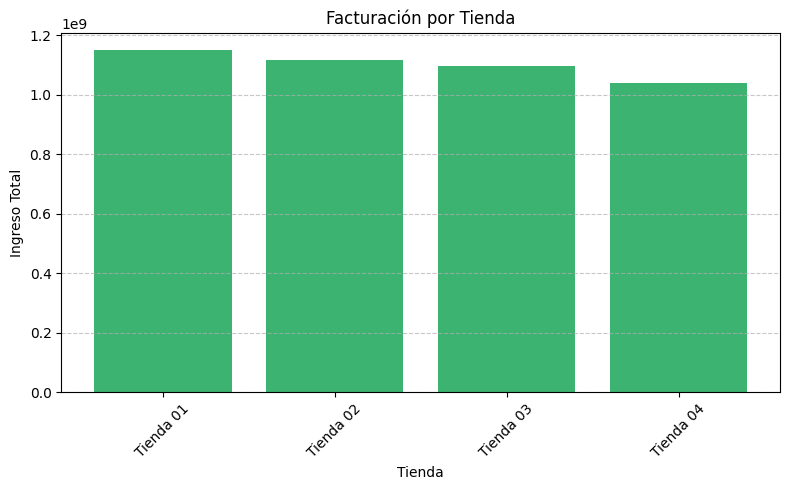

In [183]:
plt.figure(figsize=(8,5))
plt.bar(df_facturacion['Tienda'],df_facturacion['Precio'], color = "mediumseagreen")
plt.title("Facturación por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [184]:
# Total de ventas por categoria
ventas_categorias = {"Tienda 1":tienda,
                     "Tienda 2":tienda2,
                     "Tienda 3":tienda3,
                     "Tienda 4":tienda4
                     }
for tienda, df in ventas_categorias.items():
    print(f"Ventas por categoría en {tienda}:")
    ventas_categoria = (df
                        .groupby("Categoría del Producto")
                        .size()
                        .sort_values(ascending=False)
                        .reset_index(name="Numero de ventas")
    )
    print(ventas_categoria)
    print("\n")


Ventas por categoría en Tienda 1:
    Categoría del Producto  Numero de ventas
0                  Muebles               465
1             Electrónicos               448
2                 Juguetes               324
3        Electrodomésticos               312
4     Deportes y diversión               284
5   Instrumentos musicales               182
6                   Libros               173
7  Artículos para el hogar               171


Ventas por categoría en Tienda 2:
    Categoría del Producto  Numero de ventas
0                  Muebles               442
1             Electrónicos               422
2                 Juguetes               313
3        Electrodomésticos               305
4     Deportes y diversión               275
5   Instrumentos musicales               224
6                   Libros               197
7  Artículos para el hogar               181


Ventas por categoría en Tienda 3:
    Categoría del Producto  Numero de ventas
0                  Muebles             

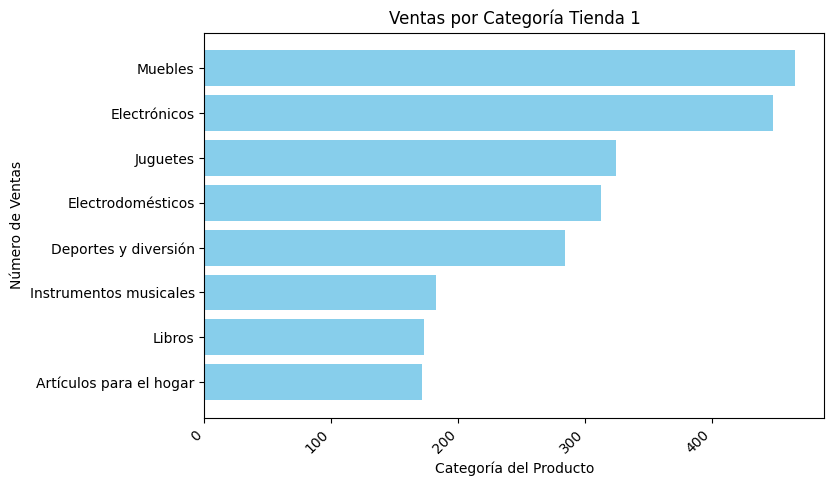

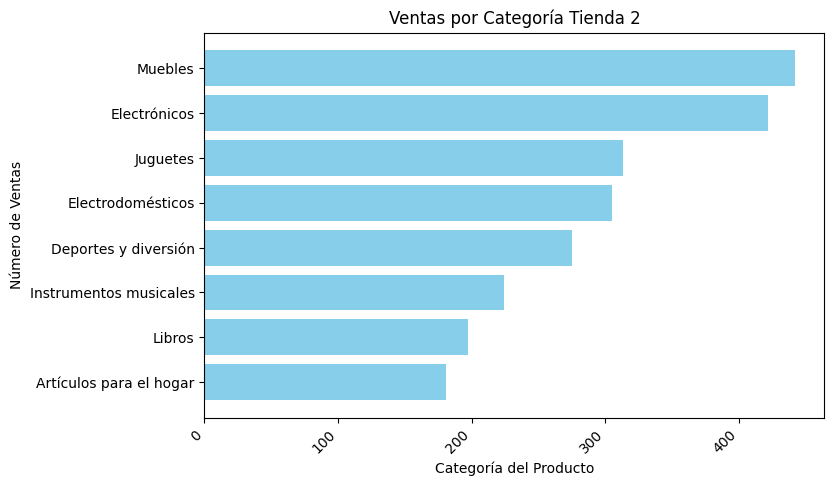

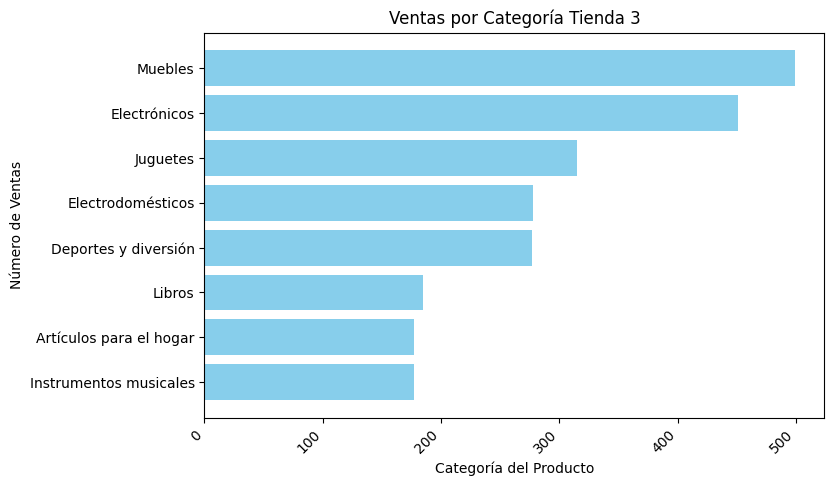

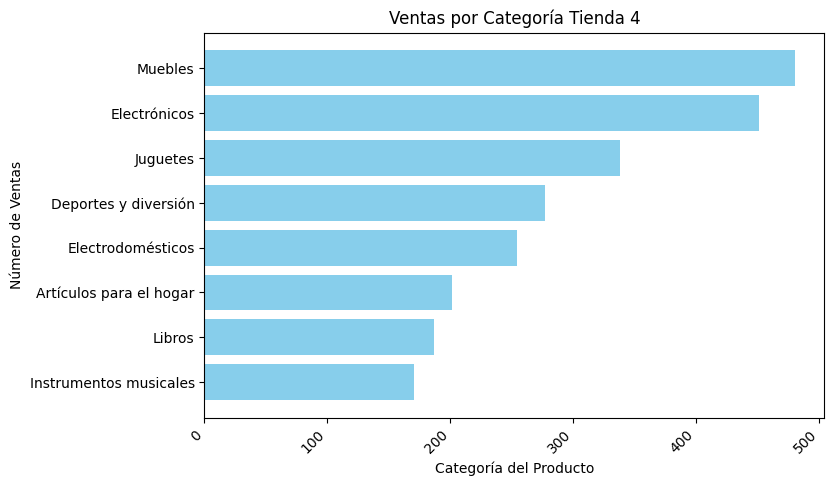

In [185]:
# Graficas que muestran la cantidad de ventas por categoria

for tienda, df in ventas_categorias.items():
    ventas_categoria = (df
                        .groupby("Categoría del Producto")
                        .size()
                        .sort_values(ascending=False)
                        .reset_index(name="Numero de ventas")
    )
    plt.figure(figsize=(8, 5))
    plt.barh(ventas_categoria['Categoría del Producto'], ventas_categoria['Numero de ventas'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'Ventas por Categoría {tienda}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Número de Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print("\n")

# 3. Calificación promedio de la tienda


In [186]:
# Calificacion promedios por tienda
Calificacion_promedio = (tiendas
                         .groupby("Tienda")["Calificación"]
                         .mean()
                         .sort_values(ascending=False)
                         .reset_index()
                         .round(2)
)
Calificacion_promedio

,Tienda,Calificación
0,Tienda 03,4.05
1,Tienda 02,4.04
2,Tienda 04,4.00
3,Tienda 01,3.98


Text(0, 0.5, 'Calificación promedio')

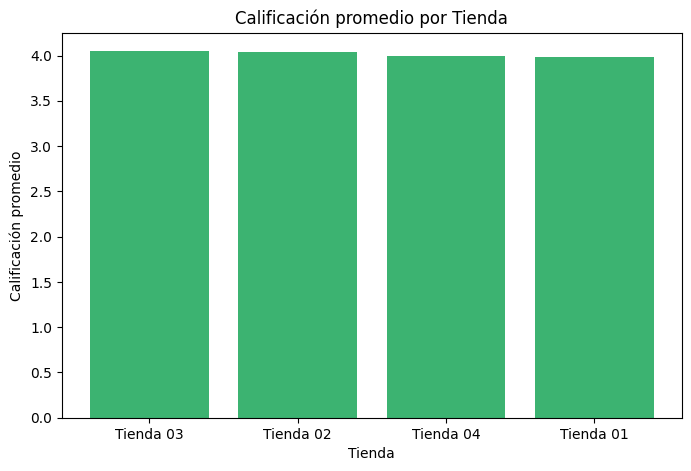

In [187]:
# Grafico de calificaciones de las 4 Tiendas
plt.figure(figsize=(8,5))
plt.bar(Calificacion_promedio['Tienda'],Calificacion_promedio['Calificación'], color = "mediumseagreen")
plt.title("Calificación promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")

# 4. Productos más y menos vendidos

In [188]:
ventas_productos = {}

for tienda in tiendas['Tienda'].unique():
    ventas = tiendas[tiendas['Tienda'] == tienda]['Producto'].value_counts().reset_index(name="Cantidad Vendida")
    # productos mas vendidos y productos menos vendidos
    max_venta = ventas['Cantidad Vendida'].max()
    min_venta = ventas['Cantidad Vendida'].min()

    productos_mas_vendidos = ventas[ventas['Cantidad Vendida'] == max_venta].reset_index()
    productos_menos_vendidos = ventas[ventas['Cantidad Vendida'] == min_venta].reset_index()

    ventas_productos[tienda] = {
        "Mas Vendidos": productos_mas_vendidos[['Producto', 'Cantidad Vendida']],
        "Menos Vendidos": productos_menos_vendidos[['Producto', 'Cantidad Vendida']]
    }
    # Imprimir los resultados para cada tienda
    print(f"Productos vendidos {tienda}")
    print(f"Productos más vendidos:")
    print(productos_mas_vendidos[['Producto', 'Cantidad Vendida']])
    print(f"\nProductos menos vendidos en:")
    print(productos_menos_vendidos[['Producto', 'Cantidad Vendida']])
    print("\n")

Productos vendidos Tienda 01
Productos más vendidos:
        Producto  Cantidad Vendida
0     Microondas                60
1  TV LED UHD 4K                60
2        Armario                60

Productos menos vendidos en:
                    Producto  Cantidad Vendida
0  Auriculares con micrófono                33
1               Celular ABXY                33


Productos vendidos Tienda 02
Productos más vendidos:
                    Producto  Cantidad Vendida
0  Iniciando en programación                65

Productos menos vendidos en:
        Producto  Cantidad Vendida
0  Juego de mesa                32


Productos vendidos Tienda 03
Productos más vendidos:
        Producto  Cantidad Vendida
0  Kit de bancas                57

Productos menos vendidos en:
                  Producto  Cantidad Vendida
0  Bloques de construcción                35


Productos vendidos Tienda 04
Productos más vendidos:
   Producto  Cantidad Vendida
0  Cama box                62

Productos menos vendidos e

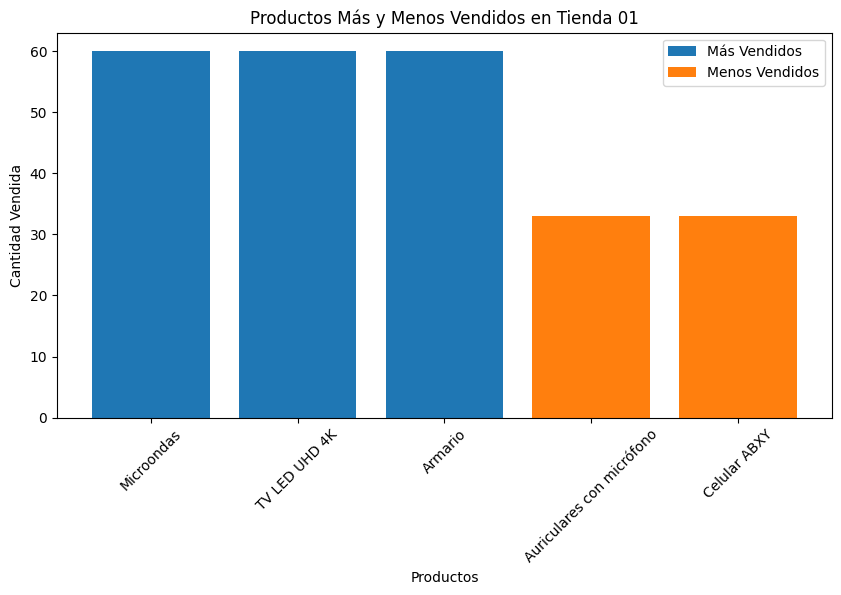

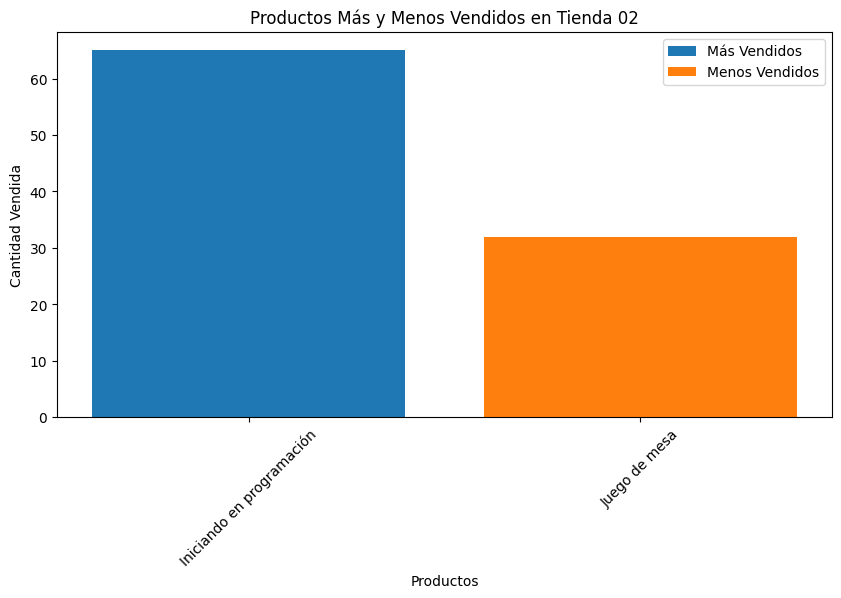

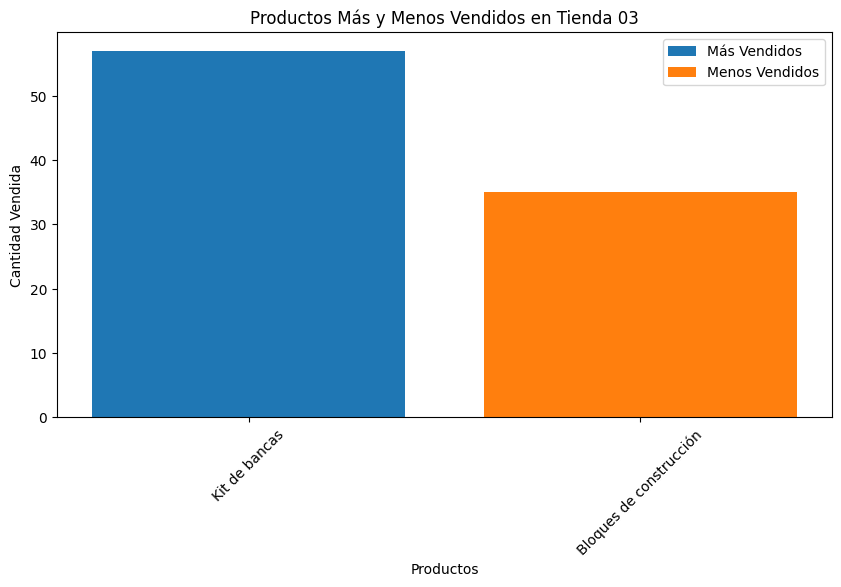

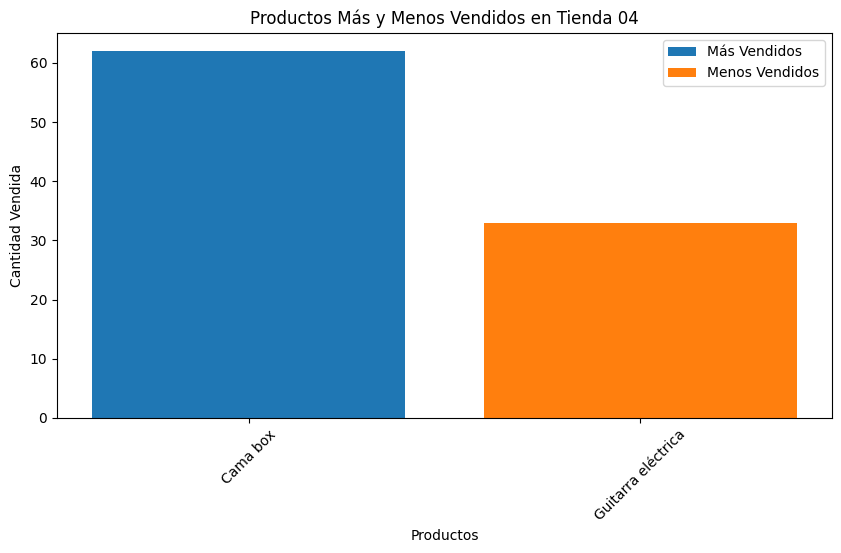

In [189]:
for tienda in ventas_productos:
    productos_mas_vendidos = ventas_productos[tienda]['Mas Vendidos']
    productos_menos_vendidos = ventas_productos[tienda]['Menos Vendidos']

    # Graficar la cantidad de productos
    plt.figure(figsize=(10, 5))
    plt.bar(productos_mas_vendidos['Producto'], productos_mas_vendidos['Cantidad Vendida'])
    plt.bar(productos_menos_vendidos['Producto'], productos_menos_vendidos['Cantidad Vendida'])
    plt.title(f"Productos Más y Menos Vendidos en {tienda}")
    plt.xlabel('Productos')
    plt.ylabel('Cantidad Vendida')
    plt.legend(['Más Vendidos', 'Menos Vendidos'])
    plt.xticks(rotation=45)
    plt.show()
    print("\n")





# 5. Envío promedio por tienda

In [193]:
# Costo de envio promedio por tienda
costo_tienda = (
    tiendas
    .groupby("Tienda")["Costo de envío"]
    .mean()
    .reset_index()
    .round(2)
)
costo_tienda

,Tienda,Costo de envío
0,Tienda 01,26018.61
1,Tienda 02,25216.24
2,Tienda 03,24805.68
3,Tienda 04,23459.46


Text(0, 0.5, 'Costo de envío promedio')

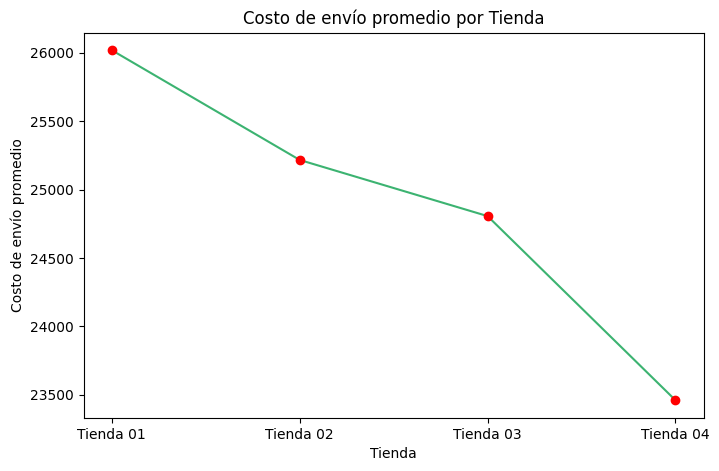

In [196]:
# Grafico costos de envio por tienda
plt.figure(figsize=(8,5))
plt.plot(costo_tienda['Tienda'],costo_tienda['Costo de envío'], color = "mediumseagreen", marker="o", mfc = "red", mec = "red")
plt.title("Costo de envío promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")

# 6. CONCLUSIONES

# Conclusiones y Recomendación

## Análisis y Comparación

### 1. Ingresos Totales:


- Tienda 01:  1.150,880,000        
- Tienda 02:  1.116,344,000        
- Tienda 03:  1.098,020,000        
- Tienda 04:  1.038,376,000        

**Conclusión:**  
La **Tienda 04** tiene los ingresos más bajos, lo que indica que esta tienda está generando menos ingresos en comparación con las otras.

### 2. Ventas por Categoría:
**Tienda 1:**
- Categoría más vendida: **Muebles** (465 ventas)
- Categoría menos vendida: **Instrumentos musicales** (182 ventas)

**Tienda 2:**
- Categoría más vendida: **Muebles** (442 ventas)
- Categoría menos vendida: **Instrumentos musicales** (224 ventas)

**Tienda 3:**
- Categoría más vendida: **Muebles** (499 ventas)
- Categoría menos vendida: **Instrumentos musicales** (177 ventas)

**Tienda 4:**
- Categoría más vendida: **Muebles** (480 ventas)
- Categoría menos vendida: **Instrumentos musicales** (170 ventas)

**Conclusión:**  
Aunque las categorías de **Muebles** y **Electrónicos** tienen un buen rendimiento, la **Tienda 04** presenta menores ventas en algunas categorías clave como **Instrumentos musicales**, lo que podría indicar un menor interés o demanda en ciertos productos.

### 3. Calificación Promedio por Tienda:


- Tienda 01: 3.98  
- Tienda 02: 4.04
- Tienda 03: 4.05  
- Tienda 04: 4.00  

**Conclusión:**  
La **Tienda 01** tiene la calificación promedio más baja de **3.98**, lo que indica una menor satisfacción del cliente en comparación con las demás tiendas. Esto es un factor negativo, ya que la satisfacción del cliente es clave para el éxito a largo plazo.

### 4. Productos Más y Menos Vendidos por Tienda:

**Tienda 01:**
- Productos más vendidos: **Microondas** (60 unidades), **TV LED UHD 4K** (60 unidades)
- Productos menos vendidos: **Auriculares con micrófono** (33 unidades), **Celular ABXY** (33 unidades)

**Tienda 02:**
- Productos más vendidos: **Iniciando en programación** (65 unidades)
- Productos menos vendidos: **Juego de mesa** (32 unidades)

**Tienda 03:**
- Productos más vendidos: **Kit de bancas** (57 unidades)
- Productos menos vendidos: **Bloques de construcción** (35 unidades)

**Tienda 04:**
- Productos más vendidos: **Cama box** (62 unidades)
- Productos menos vendidos: **Guitarra eléctrica** (33 unidades)

**Conclusión:**  
La **Tienda 04** presenta productos con baja venta, como la **Guitarra eléctrica**, lo que podría reflejar una falta de demanda o interés en algunos productos de esa tienda. Esto también resalta en comparación con otras tiendas que tienen un mayor número de productos vendidos.

### 5. Costo de Envío Promedio por Tienda:


- Tienda 01: 26,018.61               
- Tienda 02: 25,216.24               
- Tienda 03: 24,805.68               
- Tienda 04: 23,459.46               

**Conclusión:**  
Aunque **Tienda 04** tiene el costo de envío más bajo, esto no compensa otras áreas en las que tiene un menor desempeño, como los ingresos, la calificación y las ventas de productos.

---

## Conclusión Final:

**Tienda 04** tiene el menor desempeño en términos de ingresos totales, ventas por categoría, y presenta productos con baja demanda. Aunque tiene un costo de envío bajo, este factor no es suficiente para contrarrestar sus otras debilidades.

## Recomendación:

El Sr. Juan debería considerar vender en **Tienda 04**, ya que presenta un menor desempeño en comparación con las otras tiendas.
